<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/ml_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

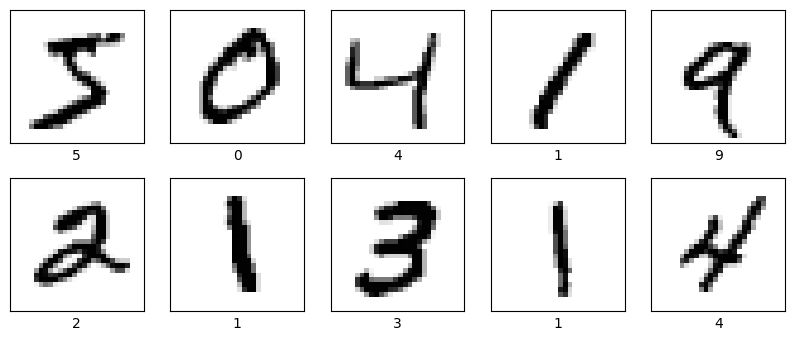

In [4]:
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

In [5]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [9]:
from tensorflow.keras import layers, models

In [10]:
model = models.Sequential([
    layers.Dense(512, activation="relu", input_shape=(28*28, )),
    layers.Dense(10, activation="softmax")
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8759 - loss: 0.4338
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9653 - loss: 0.1171
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9780 - loss: 0.0735
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9847 - loss: 0.0514
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9896 - loss: 0.0371


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9755 - loss: 0.0772


In [ ]:
test_loss, test_accuracy

(0.06572768837213516, 0.9796000123023987)

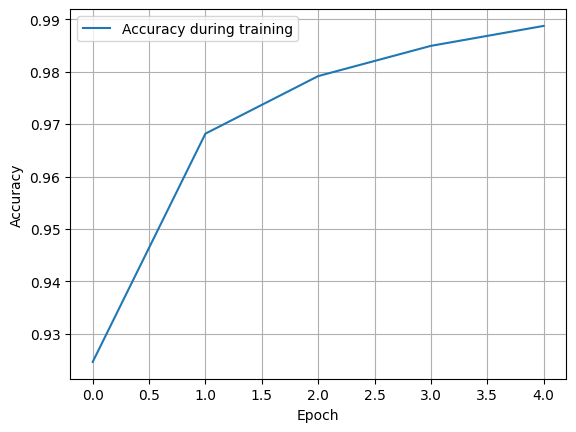

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.save('my_model.h5')

In [ ]:
json_string = model.to_json()
json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 784], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 512, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint

In [ ]:
model.save_weights('my_model.weights.h5')

In [11]:
from tensorflow.keras.models import load_model

In [12]:
model = load_model('my_model.h5')

In [13]:
import os
import numpy as np
import cv2
import matplotlib.image as mpimg

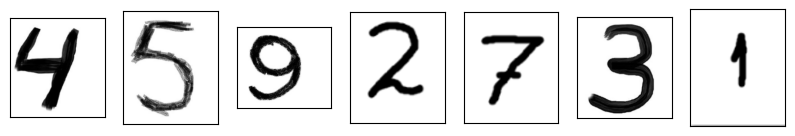

In [14]:
images = []
current_directory = os.getcwd()
directory = current_directory + '/nums'
for file in os.scandir(directory):
  images.append(mpimg.imread(file.path))

fig, axes = plt.subplots(1, 7, figsize=(10, 4))
for i, image in enumerate(images):
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  axes[i].imshow(image)

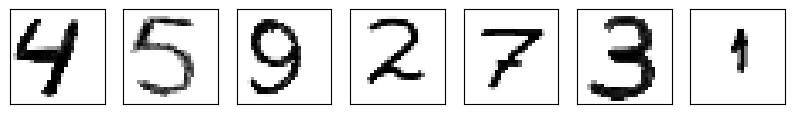

In [15]:
resized_images = []
fig, axes = plt.subplots(1, 7, figsize=(10, 4))

for i, filename in enumerate(os.listdir(directory)):
  tst = 255 - cv2.imread(os.path.join(directory, filename), 0)
  tst_resized = cv2.resize(tst, (28,28))
  tst = tst_resized.reshape((1, (28*28)))
  tst = tst.astype('float32') / 255
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  axes[i].imshow(tst_resized, cmap=plt.cm.binary)
  resized_images.append(tst)

In [16]:
for tst in resized_images:
  predictions = list(model.predict(tst)[0])
  print(predictions.index(max(predictions)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
9


## Cifar10

In [17]:
from tensorflow.keras.datasets import cifar10

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [19]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [20]:
y_train.shape

(50000, 1)

In [21]:
y_train, y_test = y_train.reshape(-1, ), y_test.reshape(-1, )

In [22]:
labels = ['plane',
          'car',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

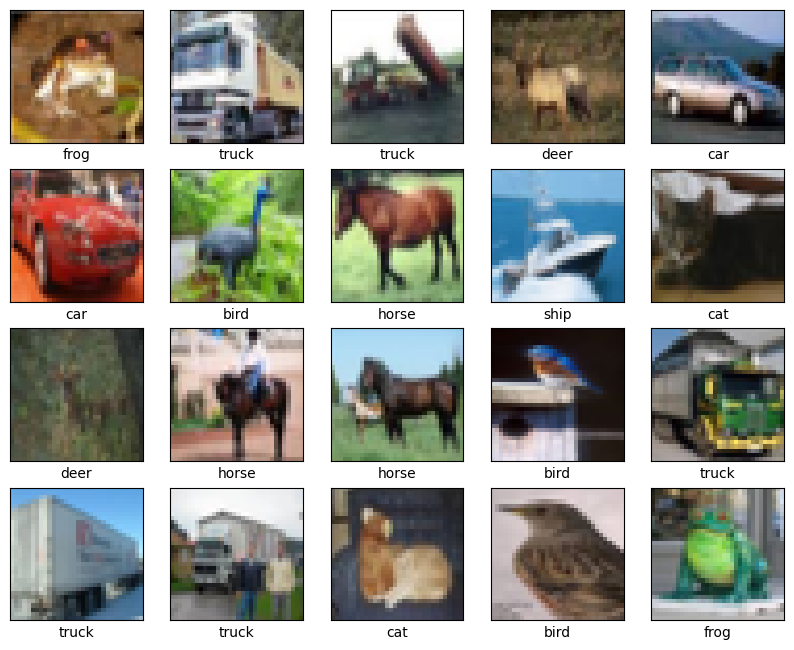

In [23]:
plt.figure(figsize=(10, 10))
for i in range(20):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(labels[y_train[i]])
plt.show()

In [24]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [25]:
y_train.shape

(50000, 10)

In [26]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [27]:
x_train, x_test = x_train / 255, x_test / 255

In [28]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", padding="same",input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),


    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 293s 369ms/step - accuracy: 0.3426 - loss: 1.7873 - val_accuracy: 0.5645 - val_loss: 1.2133
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 332s 382ms/step - accuracy: 0.5834 - loss: 1.1566 - val_accuracy: 0.6632 - val_loss: 0.9553
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 318s 377ms/step - accuracy: 0.6523 - loss: 0.9790 - val_accuracy: 0.6986 - val_loss: 0.8597
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 330s 387ms/step - accuracy: 0.6901 - loss: 0.8702 - val_accuracy: 0.7221 - val_loss: 0.7885
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 314s 377ms/step - accuracy: 0.7248 - loss: 0.7823 - val_accuracy: 0.7467 - val_loss: 0.7363
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 325s 381ms/step - accuracy: 0.7419 - loss: 0.7307 - val_accuracy: 0.7544 - val_loss: 0.7152
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 295s 378ms/step - accuracy: 0.7657 - loss: 0.6642 - val_accuracy: 0.7707 - val_loss: 0.6648
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 319s 374ms/step - accuracy: 0.7833 -

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.7971 - loss: 0.6402
Test accuracy: 0.7952


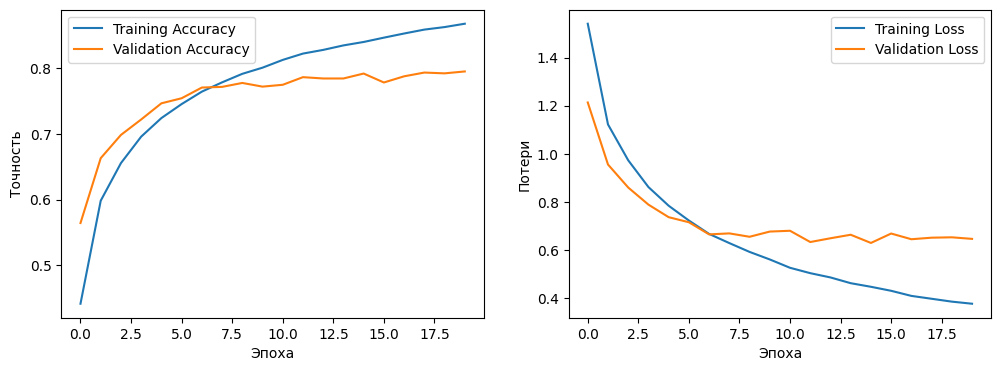

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('my_model_10_сat.h5')

In [30]:
model = load_model('my_model_10_сat.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


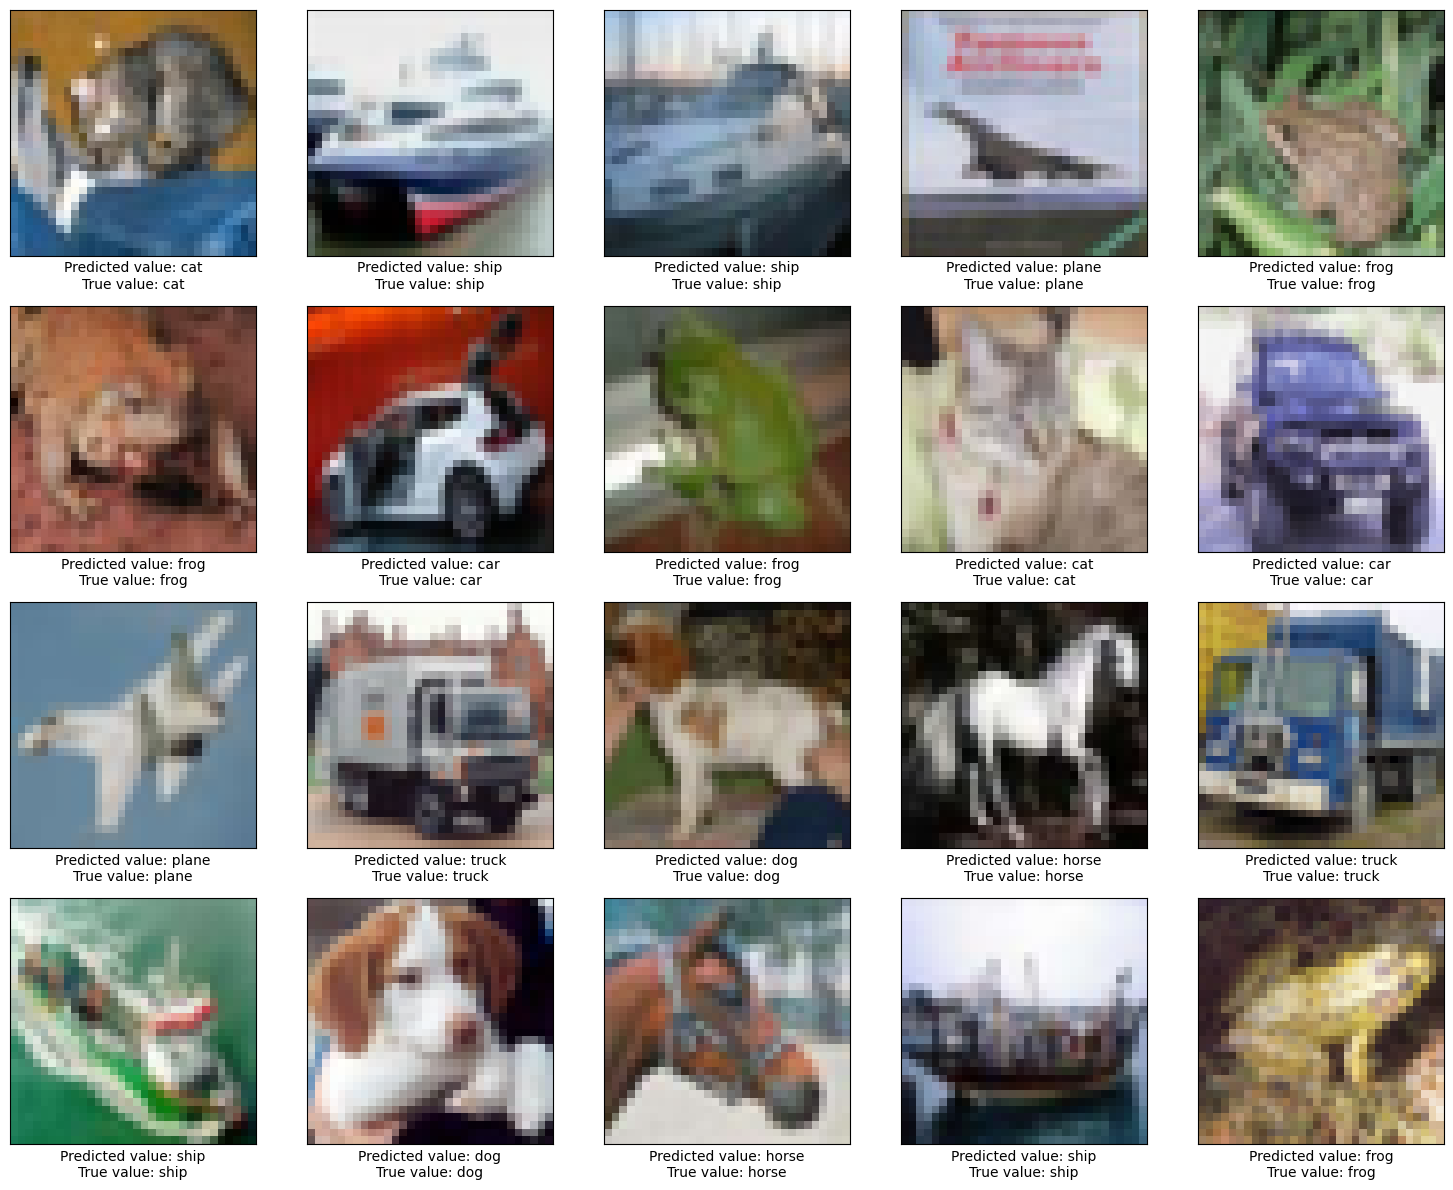

In [31]:
predictions = model.predict(x_test[:20])
plt.figure(figsize=(15, 12))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    plt.xlabel(f'Predicted value: {labels[predicted_label]}\nTrue value: {labels[true_label]}')
plt.tight_layout()
plt.show()

## Fashion mnist

In [81]:
from tensorflow.keras.datasets import fashion_mnist

In [82]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [83]:
x_train.shape

(60000, 28, 28)

In [84]:
y_train.shape

(60000,)

In [85]:
labels = [
    "T-shirt/top",
    "Trouser",
    "Pullower",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle"
]

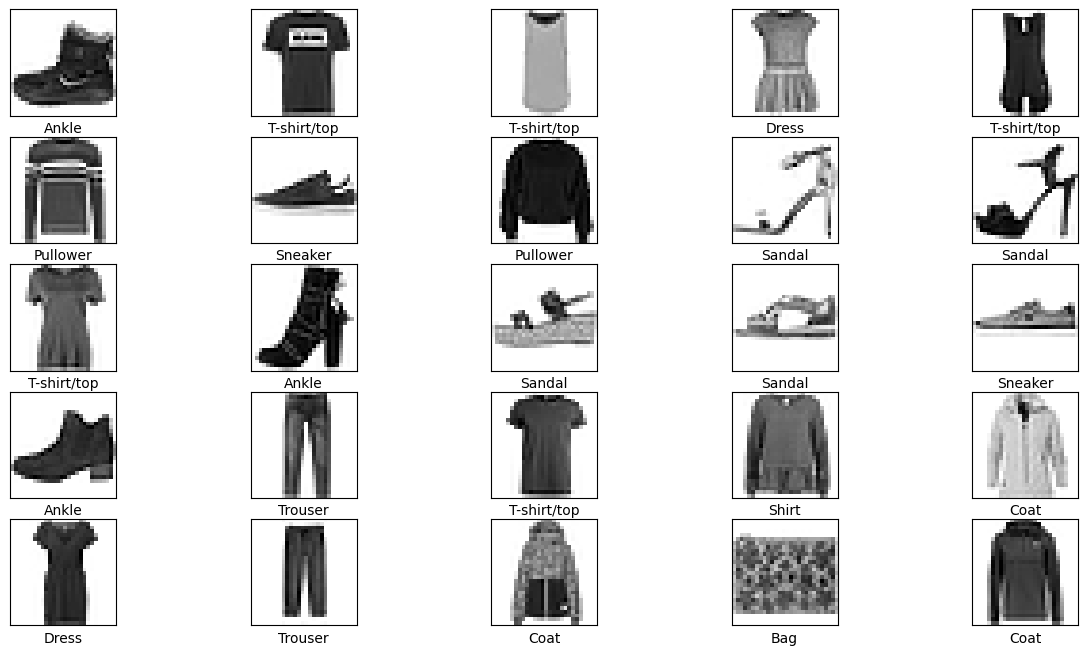

In [86]:
plt.figure(figsize= (15, 8))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(labels[y_train[i]])
plt.show()

In [87]:
x_train = x_train.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255
x_test= x_test.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

In [88]:
x_train.shape

(60000, 784)

In [89]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [90]:
model = models.Sequential([
    layers.Dense(256, activation="relu", input_shape=(28*28, )),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [55]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4599 - loss: 1.4069 - val_accuracy: 0.7528 - val_loss: 0.6490
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7421 - loss: 0.6948 - val_accuracy: 0.7812 - val_loss: 0.5539
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7884 - loss: 0.5815 - val_accuracy: 0.8109 - val_loss: 0.4978
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8136 - loss: 0.5241 - val_accuracy: 0.8258 - val_loss: 0.4730
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8261 - loss: 0.4864 - val_accuracy: 0.8391 - val_loss: 0.4400
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8380 - loss: 0.4586 - val_accuracy: 0.8449 - val_loss: 0.4231
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8412 - loss: 0.4431 - val_accuracy: 0.8428 - val_loss: 0.4265
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8506 - loss: 0.4252 - val_accurac

In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8795 - loss: 0.3361


In [58]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8795 - loss: 0.3361
Test accuracy: 0.8763


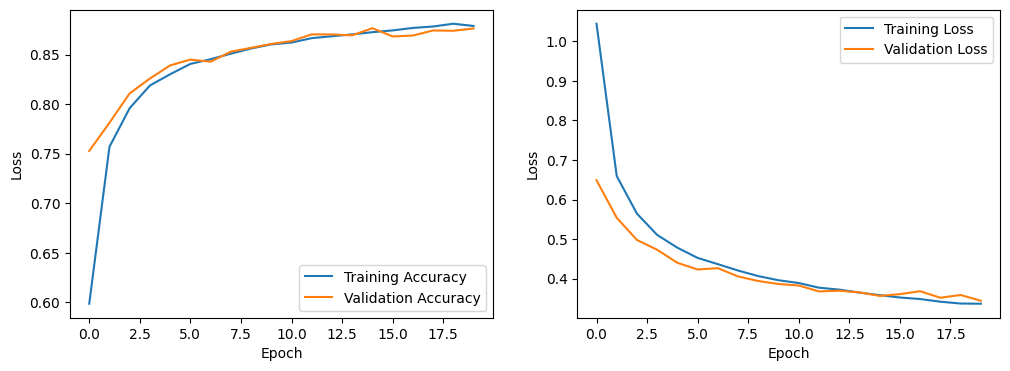

In [59]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
model.save('model_for_cloths_nn.h5')

In [93]:
model = load_model('model_for_cloths_nn.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


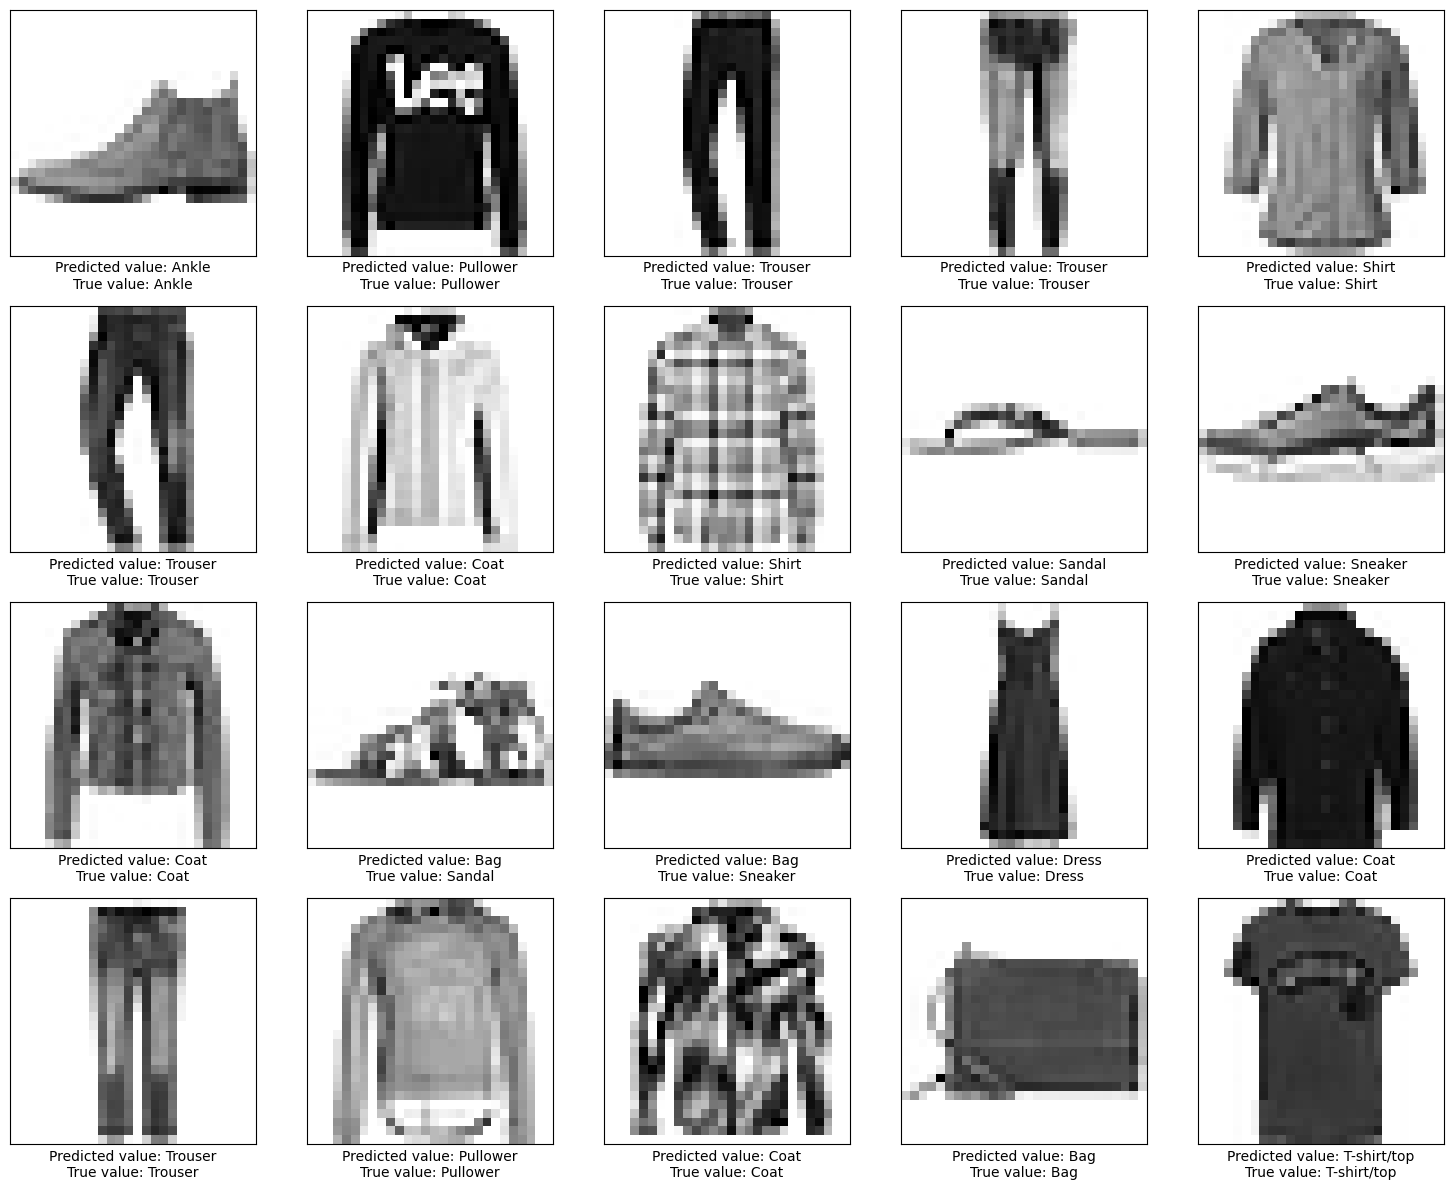

In [94]:
predictions = model.predict(x_test[:20])
plt.figure(figsize=(15, 12))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape((28, 28,)), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    plt.xlabel(f'Predicted value: {labels[predicted_label]}\nTrue value: {labels[true_label]}')
plt.tight_layout()
plt.show()